In [43]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example 5 -Working with data & real cost function
## Mean Squared Error: a cost function for regression problems
### $$ RSS = \sum_{i=1}^{n} \big( y^{(i)}- h_\theta x^{(i)} \big)^2$$
### $$ MSE = \frac{1}{n}\sum_{i=1}^{n} \big( y^{(i)}- h_\theta x^{(i)} \big)^2$$
### $$ MSE = \frac{1}{n}\sum_{i=1}^{n} \big( y - \hat{y}) \big)^2$$

In [20]:
# make sample data
x_5 = np.array([[0.1,1.2,2.4,3.2,4.1,5.7,6.5]]).transpose() # you can transpose to get 2 dimentional array 
y_5 = np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2]).reshape(7,1) # you can reshape to get 2 dimentional array 

print(x_5) # shape is (7,1)
print(y_5) # shape is (7,1)

[[0.1]
 [1.2]
 [2.4]
 [3.2]
 [4.1]
 [5.7]
 [6.5]]
[[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [28]:
#quick linear regression
regr = LinearRegression()
regr.fit(x_5,y_5)
print("Regeression array: ",regr)
print("Theta 0: ",regr.intercept_[0])
print("Theta 1: ",regr.coef_[0][0])

Regeression array:  LinearRegression()
Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


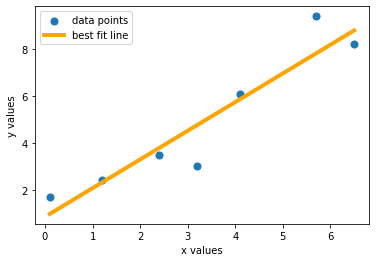

In [31]:
plt.scatter(x_5,y_5,s=50, label="data points")
plt.plot(x_5,regr.predict(x_5),color='orange',lw=4, label ="best fit line")
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.show()

In [36]:
# y_hat = theta0 + theta1*x
y_hat = 0.8475351486029536 + 1.2227264637835915*x_5
print("Estimated values y_hat are:\n",y_hat)
print('In comparison, the actual y values are\n',y_5)

Estimated values y_hat are:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [41]:
# MSE 
def mse(y_hat, y):
    n = y.size
    return np.average((y-y_hat)**2,axis=0)#axis=0# is rows
    #return sum((y - y_hat)**2)/n
    # sklearn function you can use

In [38]:
print(mse(y_hat, y_5))

[0.94796558]


In [46]:
print("MSE regression using maunal cal is", mean_squared_error(y_5,y_hat))
print("MSE regression is ", mean_squared_error(y_5,regr.predict(x_5)))

MSE regression using maunal cal is 0.9479655759794577
MSE regression using maunal cal is 0.9479655759794577


## 3D plot for MSE Cost Function
### Make data for thetas


In [66]:
nr_thetas = 200
th_0 = np.linspace(start=-1,stop=3,num=nr_thetas)
th_1 = np.linspace(start=-1,stop=3,num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0,th_1)

### Calc MSE using nested forloops

In [67]:
plot_cost = np.zeros((nr_thetas,nr_thetas))

In [68]:
for i in range(nr_thetas):
    for j in range(nr_thetas):
        y_hat = plot_t0[i][j] + plot_t1[i][j] *x_5
        plot_cost[i][j] =mse(y_hat,y_5)
print("Shape of plot_t0: ",plot_t0.shape)
print("Shape of plot_t1: ",plot_t1.shape)
print("Shape of plot_cost: ",plot_cost.shape)

Shape of plot_t0:  (200, 200)
Shape of plot_t1:  (200, 200)
Shape of plot_cost:  (200, 200)


/var/folders/c5/yyls4_8s64l5jkqjxz8yqbkh0000gn/T/ipykernel_3782/771521647.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection ='3d')


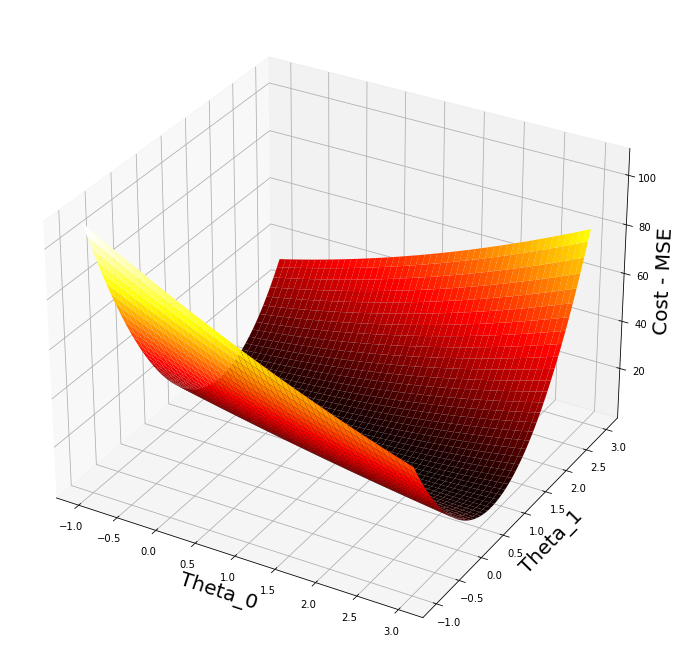

In [69]:
# plotting mse
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection ='3d')

ax.set_xlabel('Theta_0', fontsize=20)
ax.set_ylabel('Theta_1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1,plot_cost, cmap=cm.hot)
plt.show()


In [75]:
print("min_value of plot_cost: ",plot_cost.min())
ij_min = np.unravel_index(indices =plot_cost.argmin(), shape=plot_cost.shape) # returns index of the given values
print("Min occurs at (i,j)", ij_min)
print("Min MSE for Theta 0 at plot_t0[111][91]",plot_t0[111][91])
print("Min MSE for Theta 1 at plot_t1[111][91]",plot_t1[111][91])

min_value of plot_cost:  0.9483826526747164
Min occurs at (i,j) (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


## Partial Derivatives of MSE with respect to $\theta_0$ and $\theta_1$
### $$\frac{\partial MSE}{\partial \theta_0} = -\frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 X^{(i)} \big) $$
### $$\frac{\partial MSE}{\partial \theta_1} = -\frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 X^{(i)} \big) \big(x^{(i)} \big) $$

# MSE & Gradient Descent

In [76]:
# x values, y values array of theta parameters
def grad(x, y, thetas):
    n = y.size
    theta0_slope = (-2/n) * sum(y-thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y-thetas[0] - thetas[1]*x)* x)
    #return np.array([theta0_slope[0],theta1_slope[0]])
    #return np.append(arr=theta0_slope, values= theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [81]:
multiplier =0.01
thetas = np.array([2.9,2.9])

# collect data points for scatter plot
plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5,thetas[0]+ thetas[1]* x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # append new values to our numpy array
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)),axis=0)
    mse_vals =np.append(arr=mse_vals, values=mse(y_5,thetas[0]+thetas[1]*x_5))
                               
    
print("Min occurs at Theta 0: ",thetas[0])
print("Min occurs at Theta 1: ",thetas[1])
print("MSE is: ", mse(y_5, thetas[0] + thetas[1] * x_5))

Min occurs at Theta 0:  0.8532230461743415
Min occurs at Theta 1:  1.2214935332607393
MSE is:  [0.94797511]


/var/folders/c5/yyls4_8s64l5jkqjxz8yqbkh0000gn/T/ipykernel_3782/221154131.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection ='3d')


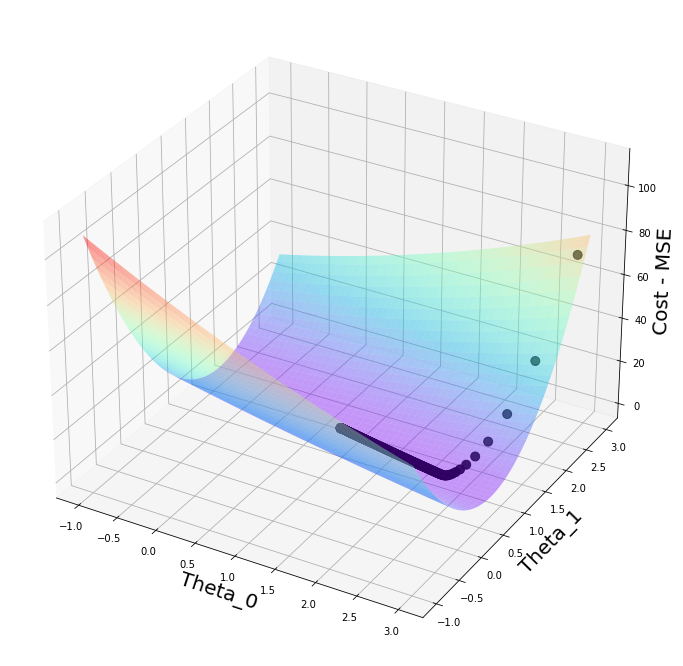

In [86]:
# plotting mse
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection ='3d')

ax.set_xlabel('Theta_0', fontsize=20)
ax.set_ylabel('Theta_1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1,plot_cost, cmap=cm.rainbow, alpha =0.4)

ax.scatter(plot_vals[:,0],plot_vals[:,1],mse_vals, color = "black", s=80)
plt.show()